In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Breast-Cancer.csv')

In [35]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
features = df.drop(columns=['diagnosis'])

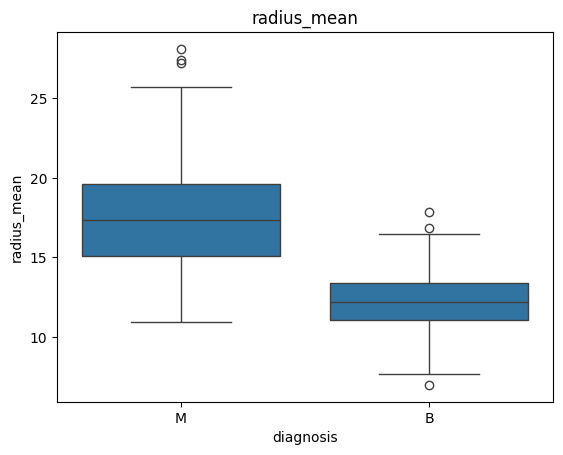

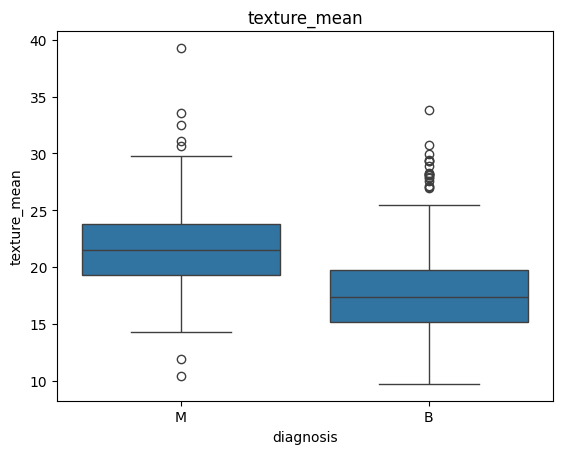

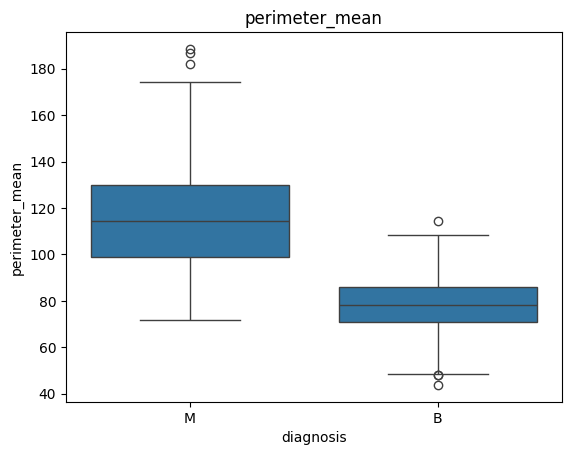

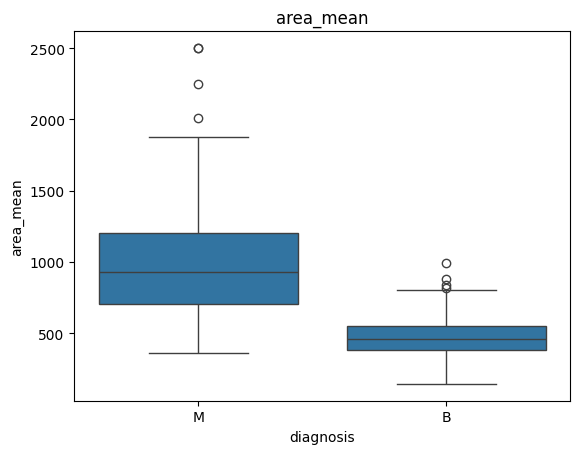

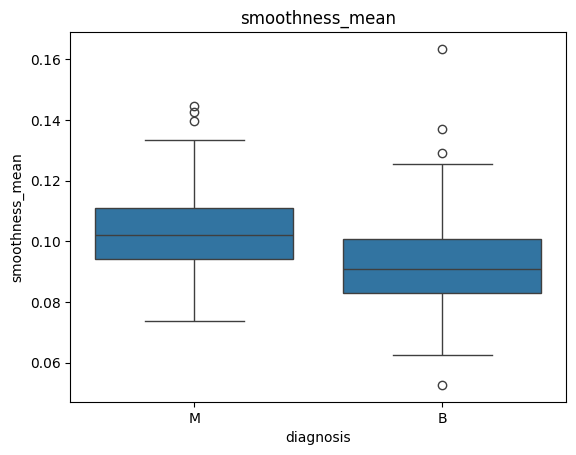

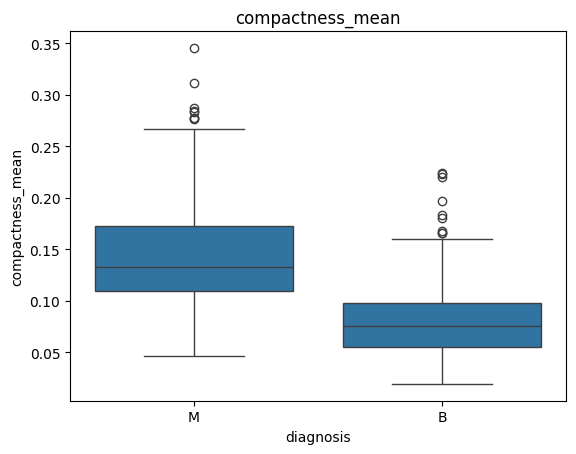

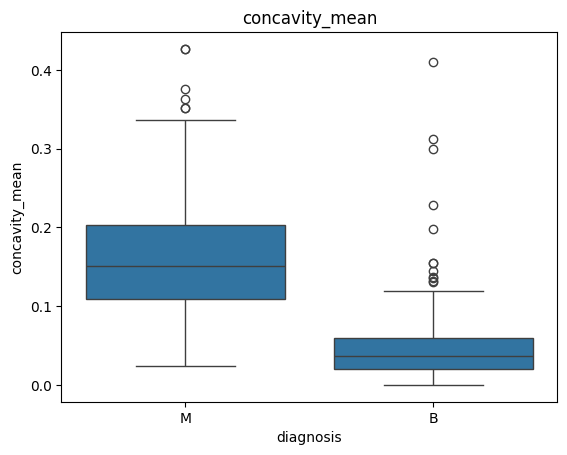

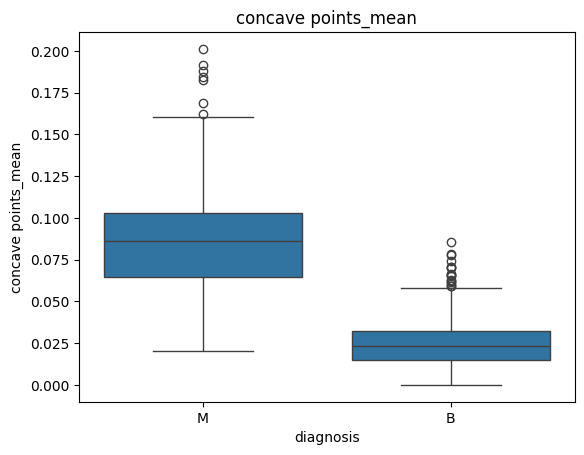

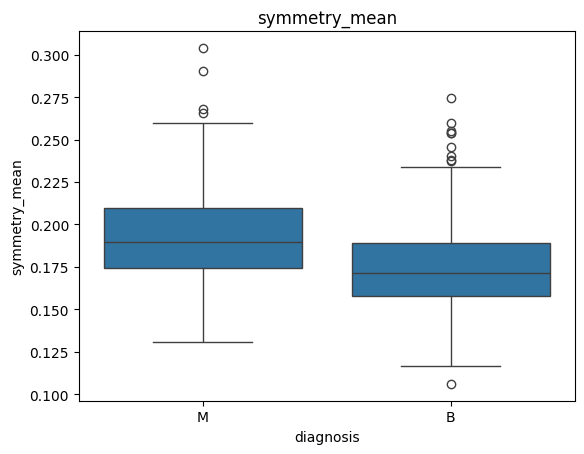

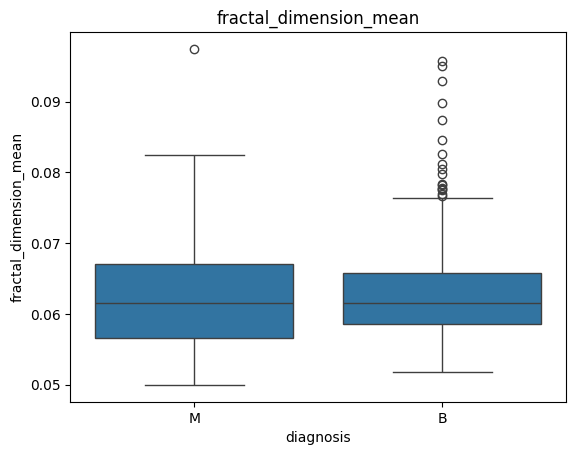

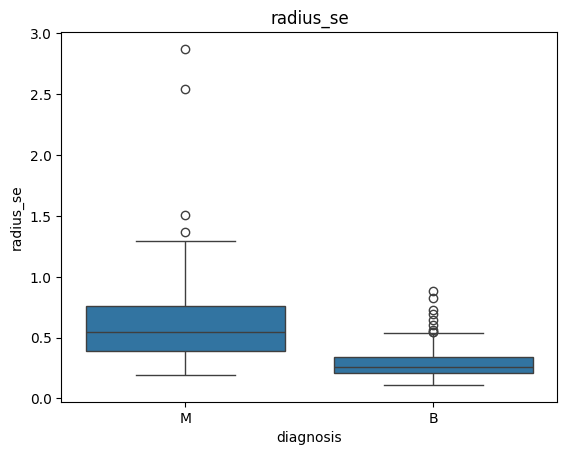

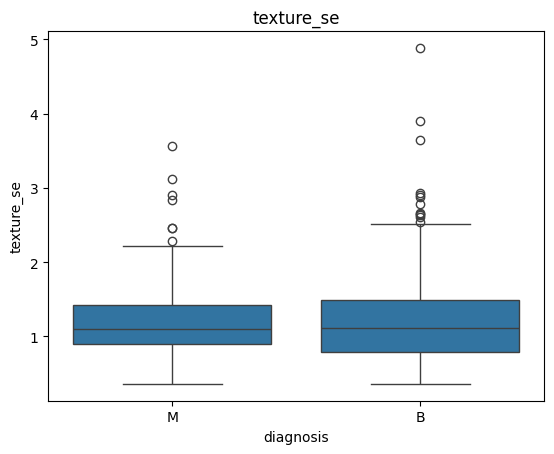

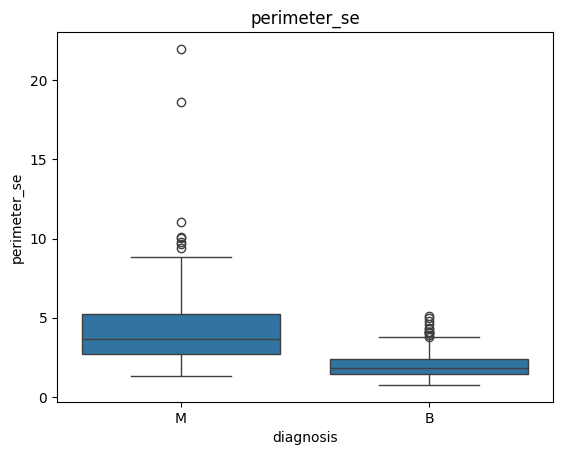

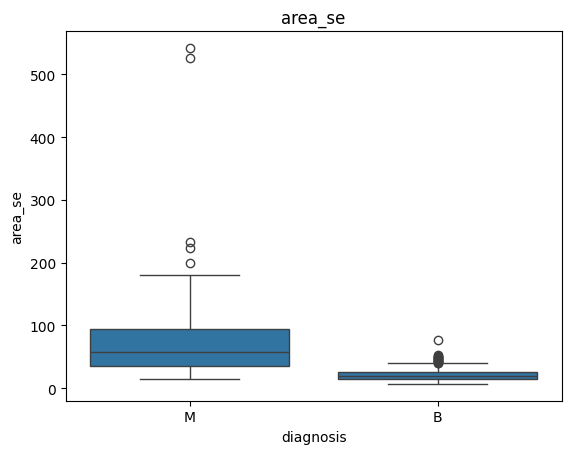

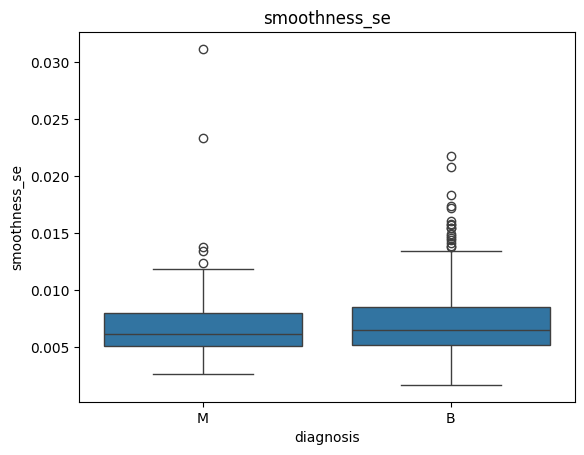

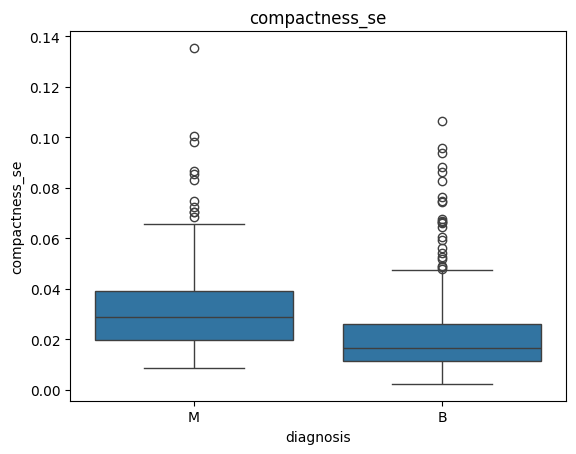

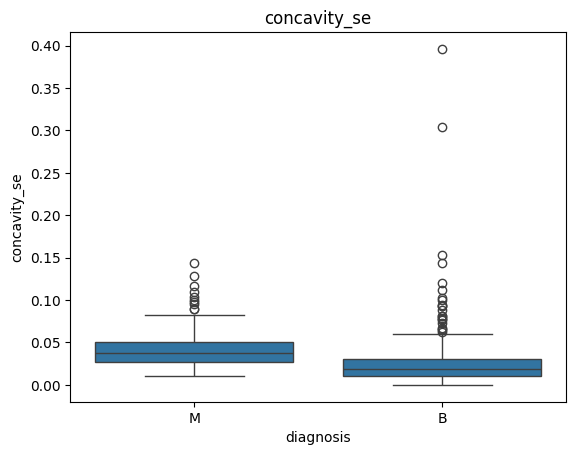

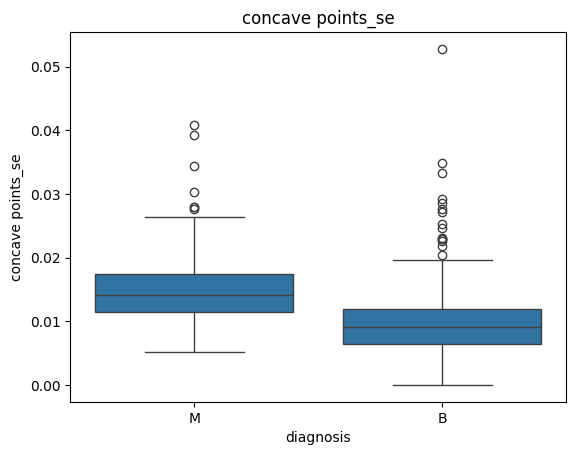

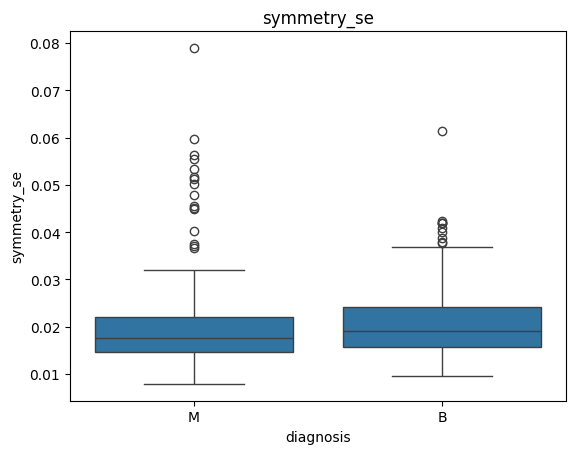

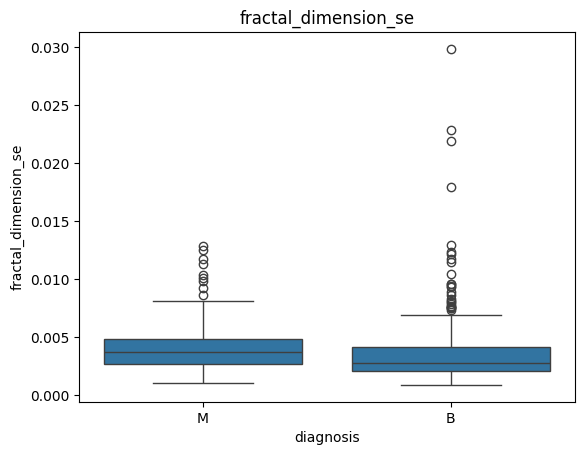

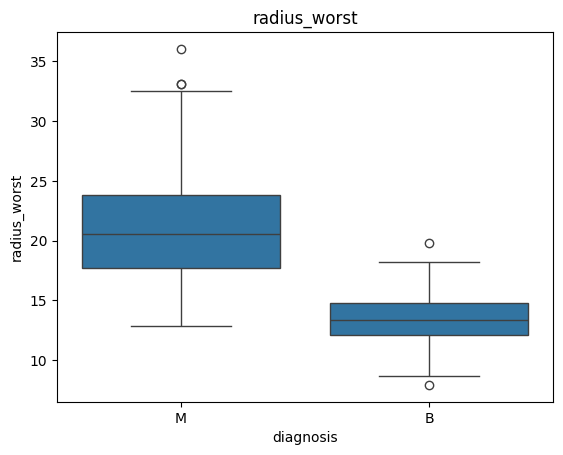

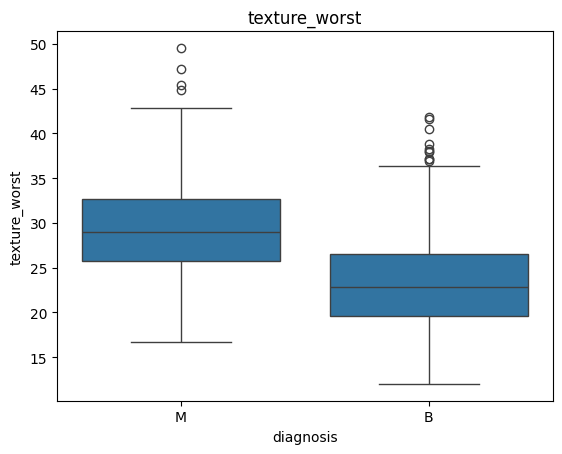

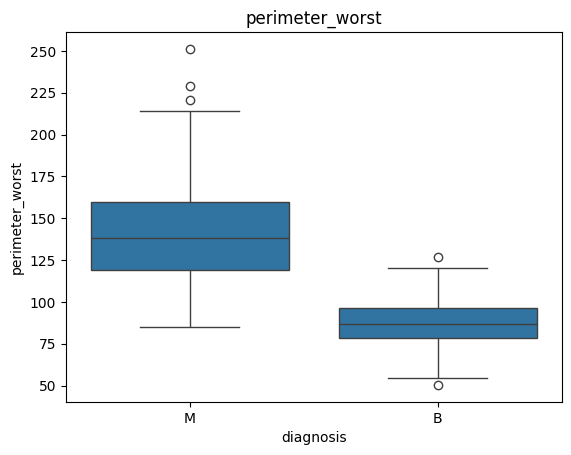

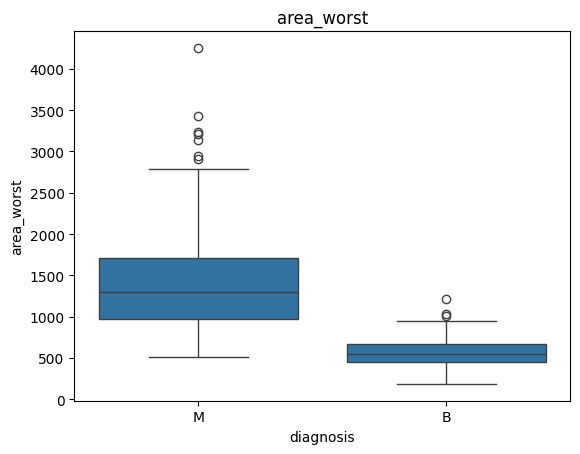

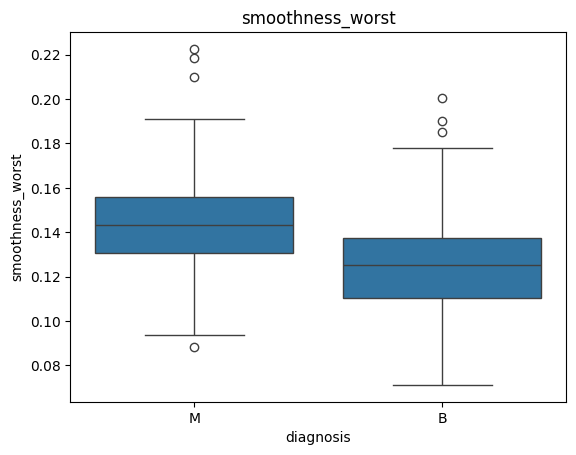

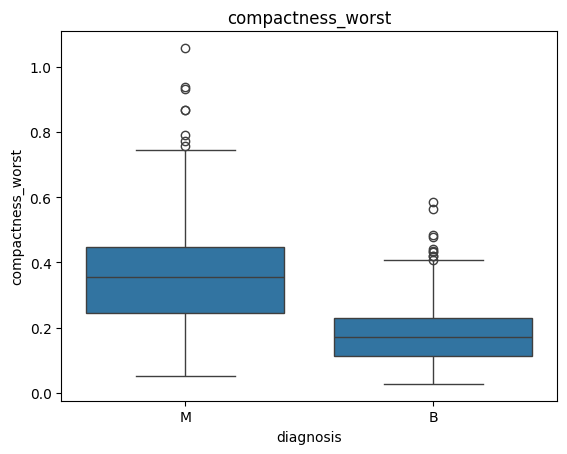

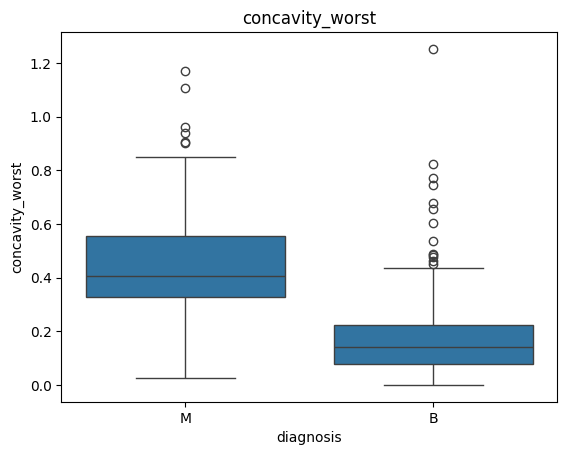

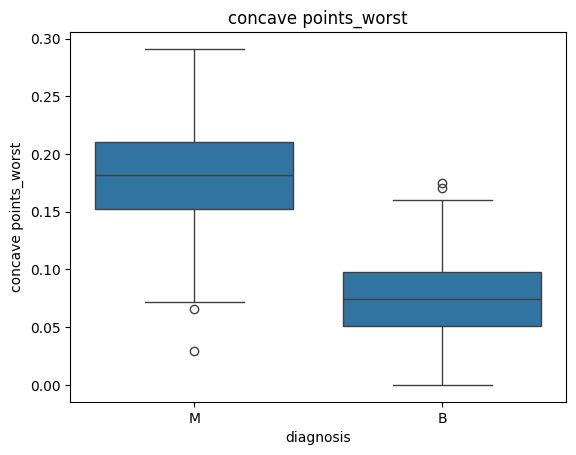

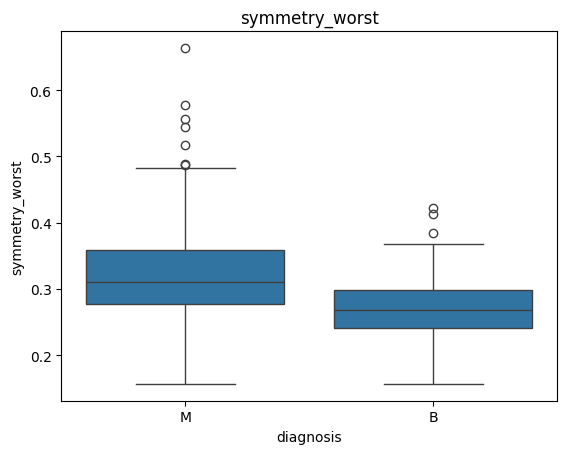

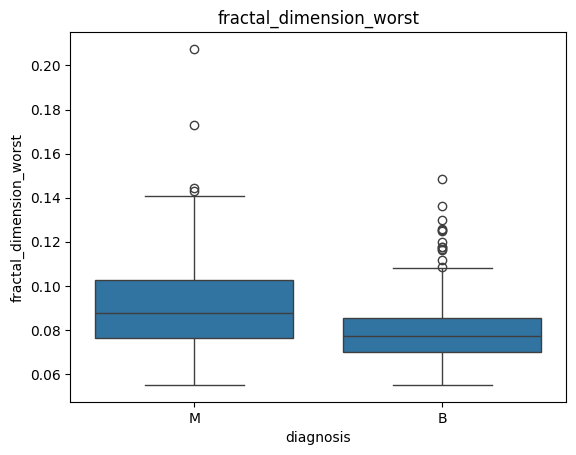

In [39]:
for col in df.columns[1:]:
  plt.figure()
  sns.boxplot(x=df['diagnosis'], y=df[col])
  plt.title(col)
  plt.show()

In [40]:
df = df[~((df['diagnosis']=='B')& (df['smoothness_mean']>0.14))]

In [41]:
df = df[~((df['diagnosis']=='B')& (df['concavity_mean']>0.18))]
df = df[~((df['diagnosis']=='M')& (df['fractal_dimension_mean']>0.09))]
df = df[~((df['diagnosis']=='B')& (df['texture_se']>3.90))]
df = df[~((df['diagnosis']=='M')& (df['smoothness_se']>0.02))]
df = df[~((df['diagnosis']=='M')& (df['compactness_se']>0.12))]
df = df[~((df['diagnosis']=='B')& (df['concavity_se']>0.22))]
df = df[~((df['diagnosis']=='B')& (df['concave points_se']>0.22))]
df = df[~((df['diagnosis']=='B')& (df['concavity_worst']>1))]
df = df[~((df['diagnosis']=='M')& (df['concave points_worst']<0.05))]
df = df[~(df['concave points_se']>0.06)]
df = df[~((df['diagnosis']=='B')& (df['fractal_dimension_worst']>0.14))]

In [42]:
df.shape

(556, 31)

In [43]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [44]:
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [47]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))
print("confusion matrix",confusion_matrix(y_test, y_pred))
print("classification", classification_report(y_test, y_pred,target_names=['Benign','Malignant']))

Accuracy: 1.0
confusion matrix [[70  0]
 [ 0 42]]
classification               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        70
   Malignant       1.00      1.00      1.00        42

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

